<a href="https://www.kaggle.com/code/anderaraujo/laptop-price-pred-feat-engineering-eda-ml?scriptVersionId=164017228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Laptop Price prediction | Feature Engineering | Exploratory Data Analysis | ML

## Objectives:
- Improve features through Feature Engineering
- Explore data to get knowledge about the problem
- Build a complete Pipeline using best practices of ML
- Train Linear Regressor model as a baseline and Random Forest Regressor
- Validating results

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('../input/laptop-price/laptop_price.csv',encoding = "ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Above we see that it will be necessary an extensive feature engineering on this data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Featuring Engineering

In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

Due to much unique values we are going to drop Product column

In [5]:
df.drop('Product', axis=1, inplace =True)

In [6]:
df['Weight'].str.split('kg', expand = True)

,0,1
0,1.37,
1,1.34,
2,1.86,
3,1.83,
4,1.37,
...,...,...
1298,1.8,
1299,1.3,
1300,1.5,
1301,2.19,


In [7]:
df['Weight'] = df['Weight'].str.split('kg', expand = True)[0].astype('float64')

We need to see how are the strings related to cpu's

In [8]:
df.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

Let's transform these strings

In [9]:
df['cpu_model'] = df['Cpu'].str.split(' ', expand=True)[1]

In [10]:
df['cpu_freq'] = df['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz','').astype('float64')

Let's see if our transformation generated null values

In [11]:
print(df['cpu_freq'].isnull().sum(),
df['cpu_model'].isnull().sum())

0 0


In [12]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

Extracting resolution, creating a ppi column assuming that screens have 14 inch

In [13]:
df['resolution'] = df.ScreenResolution.str.extract(r'(\d+x\d+)')
df['res_width'] = df['resolution'].str.split('x', expand=True)[0].astype('int64')
df['res_length'] = df['resolution'].str.split('x', expand=True)[1].astype('int64')
df['ppi'] = np.sqrt(df['res_width']^2 + df['res_length']^2)/df['Inches']
df.ppi.isnull().sum()

0

Let's see memory uniques

In [14]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

Spliting doble memory storages and extracting size

In [15]:
df['memory_size1'] = df.Memory.str.split('+', expand = True)[0].str.extract(r'(\d+GB|\d+TB)')
df['memory_size2'] = df.Memory.str.split('+', expand = True)[1].str.extract(r'(\d+GB|\d+TB)')

Transforming size to GB unit

In [16]:
df['memory_size1_gb'] = np.where(df['memory_size1'].str.contains(r'(TB)'),
         df['memory_size1'].str.extract(r'(\d+)')[0].astype('int64')*1024,
         df['memory_size1'].str.extract(r'(\d+)')[0].astype('int64'))

df['memory_size2_gb'] = np.where(df['memory_size1'].str.contains(r'(TB)'),
         df['memory_size1'].str.extract(r'(\d+)')[0].astype('int64')*1024,
         df['memory_size1'].str.extract(r'(\d+)')[0].astype('int64'))

df['total_storage'] = df['memory_size1_gb'] + df['memory_size2_gb']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [17]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [18]:
df.Gpu.str.split(' ', expand= True).describe()

,0,1,2,3,4
count,1303,1303,1302,1040,40
unique,4,12,46,55,4
top,Intel,HD,Graphics,620,Ti
freq,722,639,711,350,28


We can see above that we could use brand column [0] and model column [1]

In [19]:
df['gpu_brand'] = df.Gpu.str.split(' ', expand = True)[0]
df['gpu_model'] = df.Gpu.str.split(' ', expand = True)[1]

Let's check ram column

In [20]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [21]:
df['Ram'] = df.Ram.str.extract(r'(\d+)').astype('int64')

Cleaning column names

In [22]:
df.columns = df.columns.str.lower()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         1303 non-null   int64  
 1   company           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram               1303 non-null   int64  
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight            1303 non-null   float64
 11  price_euros       1303 non-null   float64
 12  cpu_model         1303 non-null   object 
 13  cpu_freq          1303 non-null   float64
 14  resolution        1303 non-null   object 
 15  res_width         1303 non-null   int64  
 16  res_length        1303 non-null   int64  


In [24]:
df.nunique()

laptop_id           1303
company               19
typename               6
inches                18
screenresolution      40
cpu                  118
ram                    9
memory                39
gpu                  110
opsys                  9
weight               171
price_euros          791
cpu_model             15
cpu_freq              25
resolution            15
res_width             13
res_length            10
ppi                   39
memory_size1          14
memory_size2           6
memory_size1_gb       14
memory_size2_gb       14
total_storage         14
gpu_brand              4
gpu_model             12
dtype: int64

Let's keep important columns

In [25]:
df1 = df.loc[:,['company','typename','cpu_model','cpu_freq','ram','total_storage','opsys','weight','ppi','gpu_brand','gpu_model','price_euros']]

In [26]:
df1.isna().sum()

company          0
typename         0
cpu_model        0
cpu_freq         0
ram              0
total_storage    0
opsys            0
weight           0
ppi              0
gpu_brand        0
gpu_model        0
price_euros      0
dtype: int64

There are no nulls

In [27]:
df1.columns

Index(['company', 'typename', 'cpu_model', 'cpu_freq', 'ram', 'total_storage',
       'opsys', 'weight', 'ppi', 'gpu_brand', 'gpu_model', 'price_euros'],
      dtype='object')

# Exploratory data analisys

## Which company has the higher price?

In [28]:
def plot_bar(data, x, y, title, agg):
    plt.figure(figsize = (15,7))
    ax = sns.barplot(data = data, x = x, y = y, estimator=agg, ci=None)
    ax.bar_label(ax.containers[0])
    ax.set_title(title)

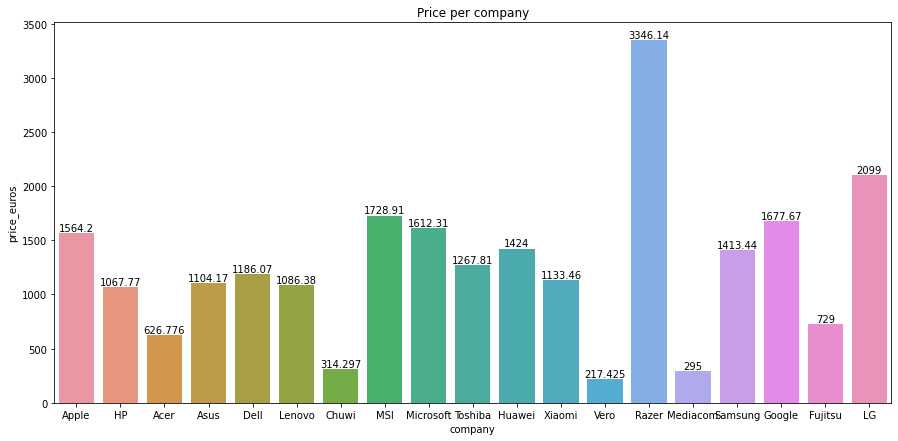

In [29]:
plot_bar(df1, x='company',y='price_euros',title='Price per company',agg= np.mean)

## How many Ram memory customers prefer buying a notebook?

In [30]:
df1.head()

,company,typename,cpu_model,cpu_freq,ram,total_storage,opsys,weight,ppi,gpu_brand,gpu_model,price_euros
0,Apple,Ultrabook,Core,2.3,8,256,macOS,1.37,4.210526,Intel,Iris,1339.69
1,Apple,Ultrabook,Core,1.8,8,256,macOS,1.34,2.981087,Intel,HD,898.94
2,HP,Notebook,Core,2.5,8,512,No OS,1.86,1.977852,Intel,HD,575.00
3,Apple,Ultrabook,Core,2.7,16,1024,macOS,1.83,3.640999,AMD,Radeon,2537.45
4,Apple,Ultrabook,Core,3.1,8,512,macOS,1.37,4.210526,Intel,Iris,1803.60


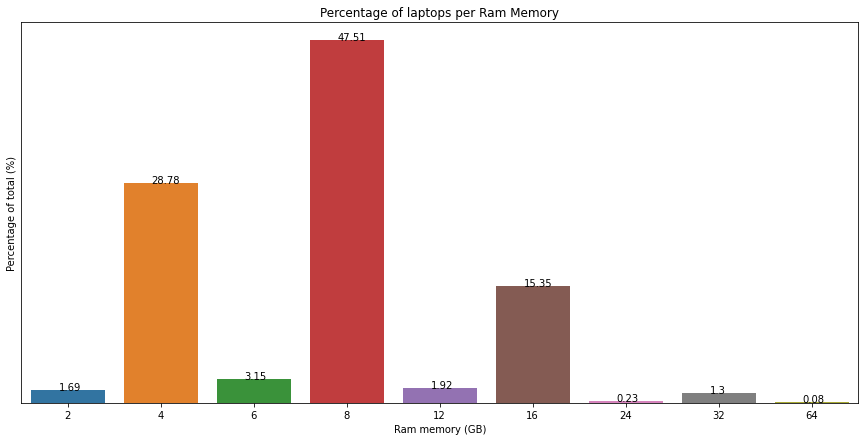

In [31]:
data_plot = (df1['ram'].value_counts(normalize = True)*100).round(2)

plt.figure(figsize=(15,7))
ax = sns.barplot(x = data_plot.index, y = data_plot)
plt.ylabel('Percentage of total (%)')
plt.xlabel('Ram memory (GB)')
plt.yticks([])
plt.title('Percentage of laptops per Ram Memory')
for l in ax.containers[0]:
    ax.annotate(l.get_height(), xy = (l.get_x()+0.3, l.get_height()))
plt.show()

## Which OS is preferred ?

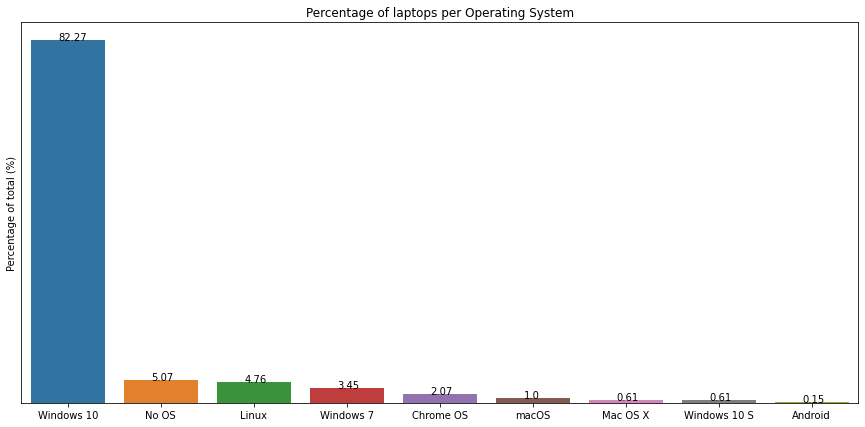

In [32]:
data_plot = (df1['opsys'].value_counts(normalize = True)*100).round(2)

plt.figure(figsize=(15,7))
ax = sns.barplot(x = data_plot.index, y = data_plot)
plt.ylabel('Percentage of total (%)')
plt.yticks([])
plt.title('Percentage of laptops per Operating System')
for l in ax.containers[0]:
    ax.annotate(l.get_height(), xy = (l.get_x()+0.3, l.get_height()))
plt.show()

## Which Cpu frequency customers choose?

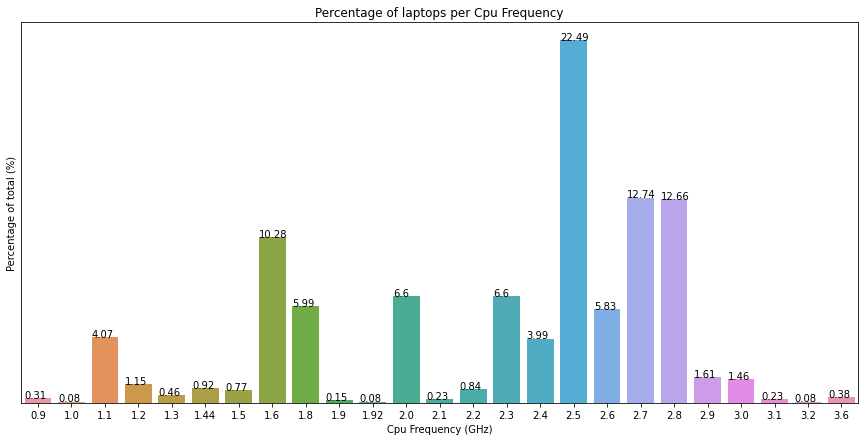

In [33]:
data_plot = (df1['cpu_freq'].value_counts(normalize = True)*100).round(2)

plt.figure(figsize=(15,7))
ax = sns.barplot(x = data_plot.index, y = data_plot)
plt.ylabel('Percentage of total (%)')
plt.xlabel('Cpu Frequency (GHz)')
plt.yticks([])
plt.title('Percentage of laptops per Cpu Frequency')
for l in ax.containers[0]:
    ax.annotate(l.get_height(), xy = (l.get_x(), l.get_height()))
plt.show()

## Which resolution do the customers prefer?

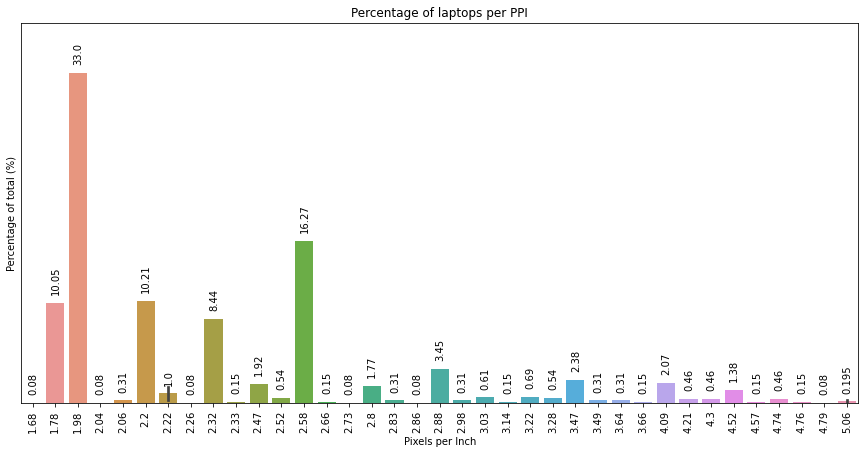

In [34]:
data_plot = (df1['ppi'].value_counts(normalize = True)*100).round(2)

plt.figure(figsize=(15,7))
ax = sns.barplot(x = data_plot.index.values.round(2), y = data_plot)
plt.ylabel('Percentage of total (%)')
plt.xlabel('Pixels per Inch')
plt.xticks(rotation=90)
plt.yticks([])
plt.ylim((0,data_plot.max()+5))
plt.title('Percentage of laptops per PPI')
for l in ax.containers[0]:
    ax.annotate(l.get_height(), xy = (l.get_x()+0.2, l.get_height()+1), rotation=90)
plt.show()

## Which variables are correlated to the price?

<AxesSubplot:>

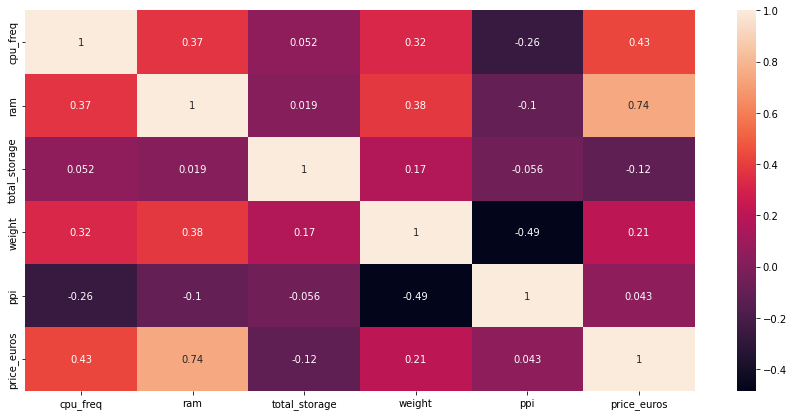

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True)

Evaluating just for numerical columns we see that ram memory is correlated to price

# Preprocessing and Modeling

Let's split our data

In [36]:
x = df1.drop('price_euros', axis=1)
y = df1.price_euros

In [37]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.75)

Separating categorical and numerical columns

In [38]:
cat_cols = x.select_dtypes(include='object').columns
num_cols = x.select_dtypes(exclude='object').columns

Creating a baseline pipeline with a linear regressor model

In [39]:
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('scaler', scaler, num_cols),('encoder', encoder, cat_cols)])
lin_reg = LinearRegression()
pipe_lr = Pipeline([('prep',preprocessor),('model',lin_reg)])

In [40]:
lr_mse = cross_val_score(pipe_lr, x_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
lr_r2 = cross_val_score(pipe_lr, x_train, y_train, cv = 5, scoring = 'r2')

print(f'For Linear Regressor we had an MSE average score of {round(lr_mse.mean(),2)} with a standard deviation of {round(lr_mse.std(),3)}\nand a R² average score of {round(lr_r2.mean(),2)} with a standard deviation of {round(lr_r2.std(),3)}')

For Linear Regressor we had an MSE average score of -131044.03 with a standard deviation of 24200.809
and a R² average score of 0.73 with a standard deviation of 0.052


Above we can get a baseline score of our model to compare with others

In [41]:
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('scaler', scaler, num_cols),('encoder', encoder, cat_cols)])
rf = RandomForestRegressor(random_state=42)
pipe_rf = Pipeline([('prep',preprocessor),('model',rf)])

Let's use a grid search to find the best estimator

In [42]:
param_grid = {
    'model__n_estimators': [100,200,300],
    'model__max_depth': range(2,10),
    'model__min_samples_split': range(2,10),
    'model__min_samples_leaf': range(2,10)
}

grid_search = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['cpu_freq', 'ram', 'total_storage', 'weight', 'ppi'], dtype='object')),
                                                                        ('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['company', 'typename', 'cpu_model', 'opsys', 'gpu_brand', 'gpu_model'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(2, 10),
                      

Getting better estimator

In [43]:
best_pipe = grid_search.best_estimator_

In [44]:
scores = cross_val_score(best_pipe, x_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(f'For Random Forest Regressor we had an average score of {round(scores.mean(),2)} with a standard deviation of {round(scores.std(),3)}')

For Random Forest Regressor we had an average score of -102252.88 with a standard deviation of 22804.345


In [45]:
rf_mse = cross_val_score(best_pipe, x_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
rf_r2 = cross_val_score(best_pipe, x_train, y_train, cv = 5, scoring = 'r2')

print(f'For Random Forest Regressor, with best estimator, we had an MSE average score of {round(rf_mse.mean(),2)} with a standard deviation of {round(rf_mse.std(),3)}\nand a R² average score of {round(rf_r2.mean(),2)} with a standard deviation of {round(rf_r2.std(),3)}')

For Random Forest Regressor, with best estimator, we had an MSE average score of -102252.88 with a standard deviation of 22804.345
and a R² average score of 0.8 with a standard deviation of 0.034


The scores are negative because the cross_val_score try to maximize mean squared error.

Now we are going to validate our model with validation data and see how mean squared error was affected

In [46]:
preds = cross_val_predict(best_pipe, x_val, y_val)
mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)

print(f'For validation data our RFC model had lower performance than before with a MSE of {mse:.2f} and R² of {r2:.2f}')

For validation data our RFC model had lower performance than before with a MSE of 121096.45 and R² of 0.72


Now let's see this difference in the chart

Text(0.5, 1.0, 'Comparison between predictions and validation data')

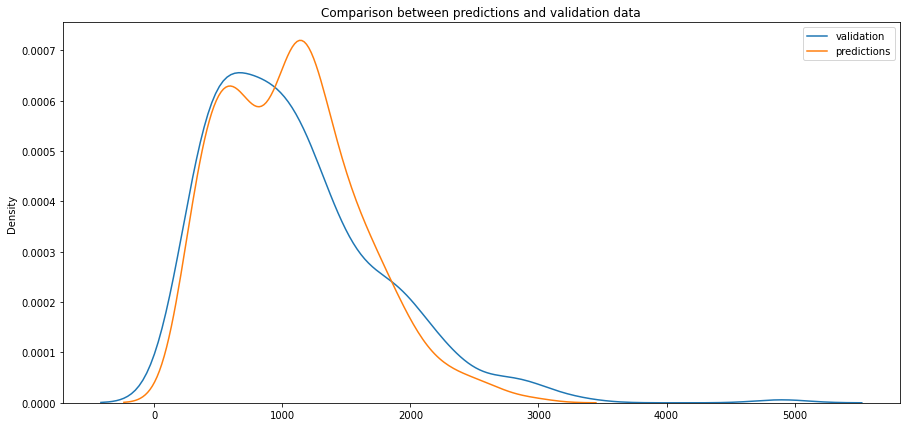

In [47]:
plt.figure(figsize=(15,7))
sns.kdeplot(y_val.values)
sns.kdeplot(preds)
plt.legend(['validation','predictions'])
plt.title('Comparison between predictions and validation data')


## Conclusion
Comparing scores of Linear Regressor baseline our Random Forest Regressor was better on training data.    
However its score went down on validation data.    
We could test a lot of models trying to improve our predictions, or using some tools to help us tunning hyperparameters    
or getting more data would be an option.